In [1]:
import sys
sys.path.append('../py-code/')
import os
import gzip as gz
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import scipy
import disrupt as dr
import amutils as at

In [ ]:
with gz.open('../data/whosampled-data.json.gz') as who_sampled_file:
        who_sampled_json = json.load(who_sampled_file)

In [0]:
#Carregando dados do allmusic 
allmusic_json = at.load_am_json_data()

---

<h2>Who Sampled</h2><br>

In [0]:
Whosampled_graphs = dict()
edges_to_consider_whosampled = dict()
for ano in range(1940, 2021, 1):
  for sample in who_sampled_json:
    for key in who_sampled_json[sample].keys():
      if who_sampled_json[sample][key]['by']!=who_sampled_json[sample][key]['other_track_by']:
        if key[:3]!='was':
          if who_sampled_json[sample][key]['track']['year']<ano+1:
            edges_to_consider_whosampled[sample] = who_sampled_json[sample] 
        else:
          if int(who_sampled_json[sample][key]['other_track']['year'])<ano+1:
            edges_to_consider_whosampled[sample] = who_sampled_json[sample]
  
  Whosampled_graphs[ano] = at.build_graph_who_sampled(who_sampled_json, edges_to_consider=edges_to_consider_whosampled)

<br><h3>Years Coverage:</h3><br>

In [77]:
years_samples = dict()
years_sampleds = dict()
for sample in who_sampled_json:
  for relation in who_sampled_json[sample]:
    if relation[:3]=='was':
      if int(who_sampled_json[sample][relation]['other_track']['year'])>2020:
        print(who_sampled_json[sample][relation]['other_track']['name'])
      if int(who_sampled_json[sample][relation]['other_track']['year']) in years_samples.keys():
        years_samples[int(who_sampled_json[sample][relation]['other_track']['year'])]+=1
      else:
        years_samples[int(who_sampled_json[sample][relation]['other_track']['year'])] = 1
    else:
      if int(who_sampled_json[sample][relation]['other_track']['year']) in years_sampleds.keys():
        years_sampleds[int(who_sampled_json[sample][relation]['other_track']['year'])]+=1
      else:
        years_sampleds[int(who_sampled_json[sample][relation]['other_track']['year'])]=1

Dönüyorum Eski Sevgilime
Eye in the Sky (The Talion Law Optical Radio Mix)
It's Different for Girls


In [0]:
years_samples_df = pd.DataFrame(years_samples, index = ['Number of samples']).T
index = years_samples_df.index.sort_values()
years_samples_df = pd.DataFrame(years_samples_df.loc[index])
years_samples_df.index = [str(i) for i in index]

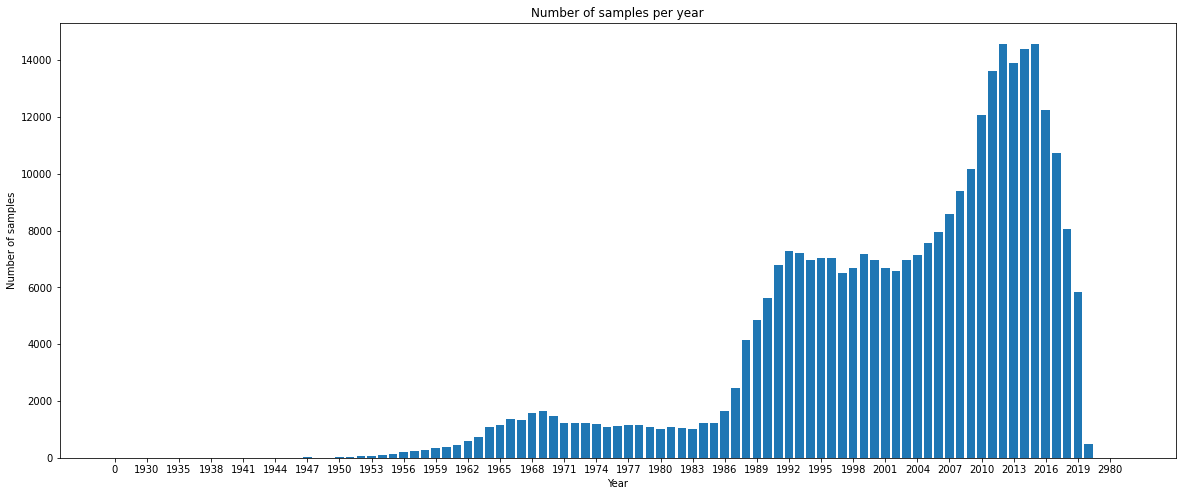

In [72]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.bar(years_samples_df.index, years_samples_df['Number of samples'])
plt.xticks([years_samples_df.index[i] for i in range(len(years_samples_df.index)) if i%3==0 or int(years_samples_df.index[i])<1800])
plt.title('Number of samples per year')
plt.xlabel('Year')
plt.ylabel('Number of samples')
plt.show()

<br><p>Strange years in sample songs</p><br>

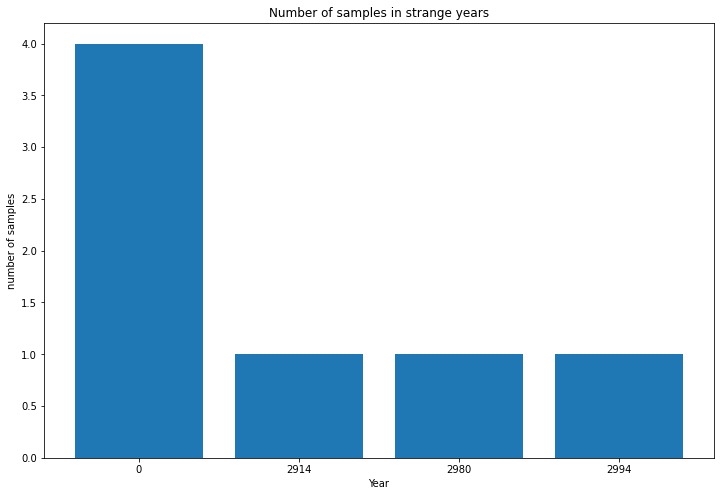

In [73]:
fig, ax = plt.subplots(figsize=(12, 8))
index = list(years_samples_df.index[0]) + list(years_samples_df.index[-3:])
plt.bar(index, years_samples_df['Number of samples'].loc[index])
plt.title('Number of samples in strange years')
plt.xlabel('Year')
plt.ylabel('number of samples')
plt.show()

In [0]:
years_sampleds_df = pd.DataFrame(years_sampleds, index = ['Number of sampleds']).T
index = years_sampleds_df.index.sort_values()
years_sampleds_df = pd.DataFrame(years_sampleds_df.loc[index])
years_sampleds_df.index = [str(i) for i in index]

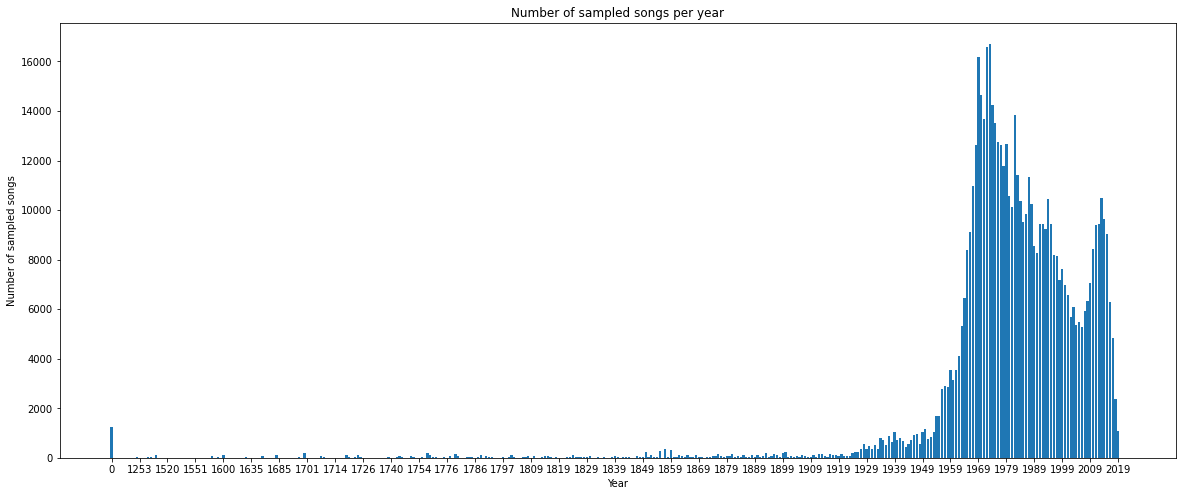

In [74]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(years_sampleds_df.index, years_sampleds_df['Number of sampleds'])
plt.xticks([str(years_sampleds_df.index[i]) for i in range(len(years_sampleds_df.index)) if i%10==0])
plt.title('Number of sampled songs per year')
plt.xlabel('Year')
plt.ylabel('Number of sampled songs')
plt.show()

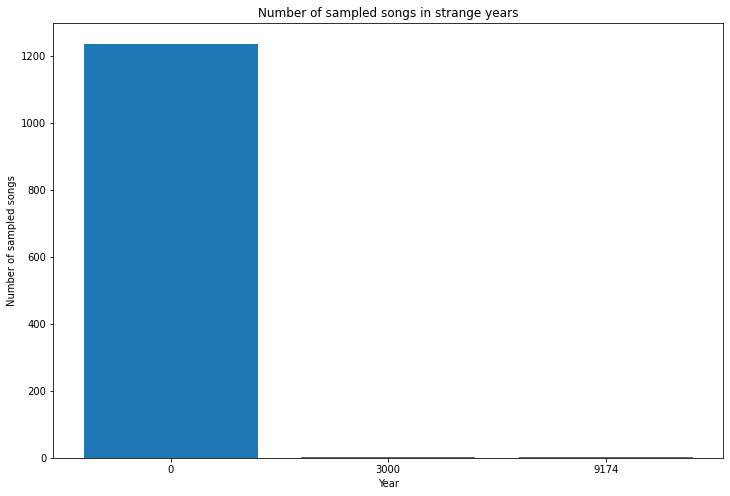

In [75]:
fig, ax = plt.subplots(figsize=(12, 8))
index = list(years_sampleds_df.index[0]) + list(years_sampleds_df.index[-2:])
plt.bar(index, years_sampleds_df['Number of sampleds'].loc[index])
plt.title('Number of sampled songs in strange years')
plt.xlabel('Year')
plt.ylabel('Number of sampled songs')
plt.show()

<br><h3>Total number of samples, remixes and covers:</h3><br>

In [8]:
print(len(who_sampled_json))

611537


<br><h3>Number of nodes and edges in the final graph:</h3><br>

In [9]:
print('Artists:',Whosampled_graphs[2020].number_of_nodes())
print('Total number of links:', Whosampled_graphs[2020].number_of_edges())

Artists: 166078
Total number of links: 618433


<br><p>This count ignores self loops and the links are formed by all the artists who sampled a song, pointing to the first artist mentioned in the composers of that song.<br>This explains why the here we have more links than points in the database. </p><br>

<br><h3>Songs</h3><br>

In [0]:
songs_sampled = list()
songs_that_sampled = list()
for sample in who_sampled_json:
  for relation in who_sampled_json[sample]:
    if relation[:3]=='was':
      songs_sampled.append(who_sampled_json[sample][relation]['track']['name'])
      songs_that_sampled.append(who_sampled_json[sample][relation]['other_track']['name'])
    else:
      songs_sampled.append(who_sampled_json[sample][relation]['other_track']['name'])
      songs_that_sampled.append(who_sampled_json[sample][relation]['track']['name'])

In [11]:
print('Number of songs that was sampled:',len(set(songs_sampled)))
print('Number of songs that sampled:',len(set(songs_that_sampled)))
print('Number of songs that sampled and was sampled:',len(set(songs_that_sampled).intersection(set(songs_sampled))))
print('Total number of songs:', len(set(songs_that_sampled).union(set(songs_sampled))))

Number of songs that was sampled: 139992
Number of songs that sampled: 320134
Number of songs that sampled and was sampled: 71350
Total number of songs: 388776


<br><h3>Number of nodes and edges per year</h3><br>

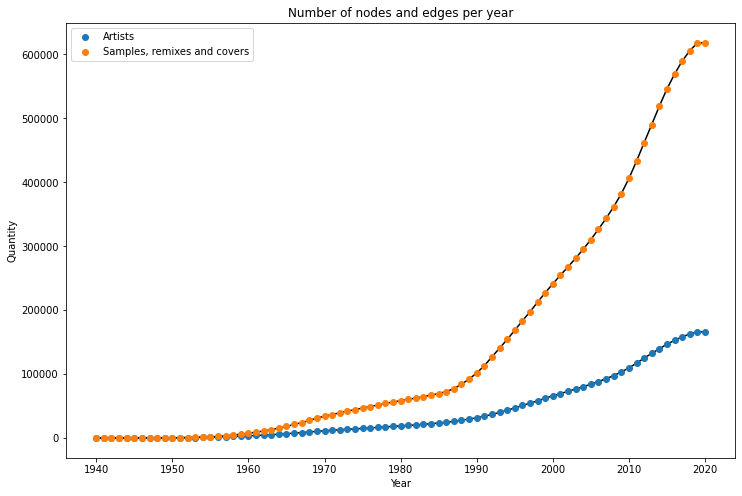

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Number of nodes and edges per year')
plt.xlabel('Year')
plt.ylabel('Quantity')
ax.plot(range(1940,2021),[len(Whosampled_graphs[i].nodes()) for i in Whosampled_graphs], color = 'black', zorder = 1)
ax.scatter(range(1940,2021),[len(Whosampled_graphs[i].nodes()) for i in Whosampled_graphs], zorder = 2, label = 'Artists')
ax.plot(range(1940,2021),[len(Whosampled_graphs[i].edges()) for i in Whosampled_graphs], color = 'black', zorder = 1)
ax.scatter(range(1940,2021),[len(Whosampled_graphs[i].edges()) for i in Whosampled_graphs], zorder = 2, label = 'Samples, remixes and covers')
ax.legend()
plt.show()

---

<h2>Allmusic</h2><br>

In [13]:
Allmusic_graphs = dict()
nodes_to_consider_allmusic = list()
print('Decade  Nodes Edges')
for decade in range(1940,2020,10):
  for artist in allmusic_json:
   if set(range(1940,decade+1,10)).intersection(allmusic_json[artist]['decades']):
    nodes_to_consider_allmusic.append(artist)
  Allmusic_graphs[decade] = at.build_graph(allmusic_json, nodes_to_consider=nodes_to_consider_allmusic, decades_to_consider=range(1940,decade+1,10))

Decade  Nodes Edges


<br><h3>Total number of artists:</h3><br>

In [14]:
print(len(allmusic_json))

162971


<br><h3>Number of nodes and edges in the final graph:</h3><br>

In [15]:
print('Artists:',Allmusic_graphs[2010].number_of_nodes())
print('Total number of links:', Allmusic_graphs[2010].number_of_edges())

Artists: 29878
Total number of links: 115053


<br><p> It is smaller than expected, because there are some artists who do not have in which decades they were active cataloged on allmusic  </p><br>

<br><h3>Number of nodes and edges per year</h3><br>

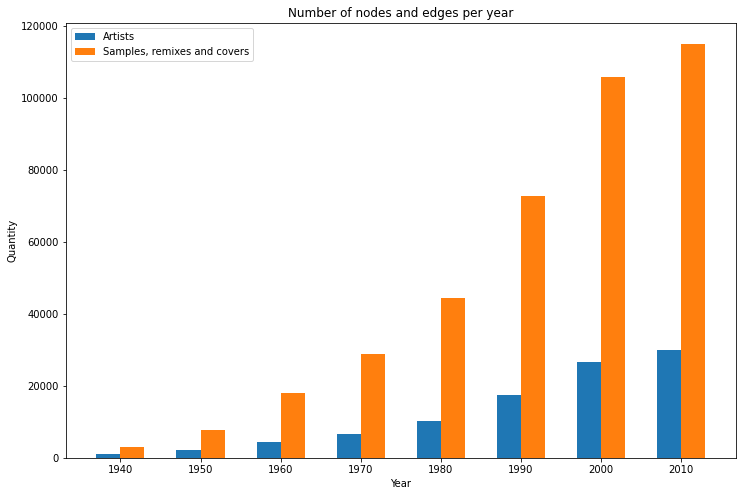

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Number of nodes and edges per year')
plt.xlabel('Year')
plt.ylabel('Quantity')

ax.bar(np.array(range(1940,2020,10))-1.5,[len(Allmusic_graphs[i].nodes()) for i in Allmusic_graphs], zorder = 2, label = 'Artists', width = 3)
ax.bar(np.array(range(1940,2020,10))+1.5, [len(Allmusic_graphs[i].edges()) for i in Allmusic_graphs], zorder = 2, label = 'Samples, remixes and covers', width = 3)
ax.legend()
plt.show()